# Mount Drive

In [166]:
##from google.colab import drive
##drive.mount('/content/drive')

# Import Lib and Dataset

In [167]:
import pandas as pd
import numpy as np
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error, mean_absolute_error,mean_absolute_percentage_error

In [168]:
df = pd.read_csv("/Users/my-spaces/Documents/GitHub/Time-Series/GRAB.csv")

In [169]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-12-01,13.595,13.63,11.01,11.01,11.01,8964400
1,2021-12-02,13.055,13.29,8.13,8.75,8.75,35751200
2,2021-12-03,9.160,9.52,8.45,8.99,8.99,29667200
3,2021-12-06,8.950,9.10,8.23,9.00,9.00,25416000
4,2021-12-07,9.055,9.06,8.32,8.85,8.85,25775900


In [170]:
df['Date']

0      2021-12-01
1      2021-12-02
2      2021-12-03
3      2021-12-06
4      2021-12-07
          ...    
610    2024-05-07
611    2024-05-08
612    2024-05-09
613    2024-05-10
614    2024-05-13
Name: Date, Length: 615, dtype: object

In [171]:
df['Date'] = pd.to_datetime(df['Date'], format = '%Y-%m-%d')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-12-01,13.595,13.63,11.01,11.01,11.01,8964400
1,2021-12-02,13.055,13.29,8.13,8.75,8.75,35751200
2,2021-12-03,9.160,9.52,8.45,8.99,8.99,29667200
3,2021-12-06,8.950,9.10,8.23,9.00,9.00,25416000
4,2021-12-07,9.055,9.06,8.32,8.85,8.85,25775900


In [172]:
df.set_index('Date', inplace=True)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-12-01,13.595,13.63,11.01,11.01,11.01,8964400
2021-12-02,13.055,13.29,8.13,8.75,8.75,35751200
2021-12-03,9.160,9.52,8.45,8.99,8.99,29667200
2021-12-06,8.950,9.10,8.23,9.00,9.00,25416000
2021-12-07,9.055,9.06,8.32,8.85,8.85,25775900


In [173]:
origin_df = df
origin_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-12-01,13.595,13.63,11.01,11.01,11.01,8964400
2021-12-02,13.055,13.29,8.13,8.75,8.75,35751200
2021-12-03,9.160,9.52,8.45,8.99,8.99,29667200
2021-12-06,8.950,9.10,8.23,9.00,9.00,25416000
2021-12-07,9.055,9.06,8.32,8.85,8.85,25775900


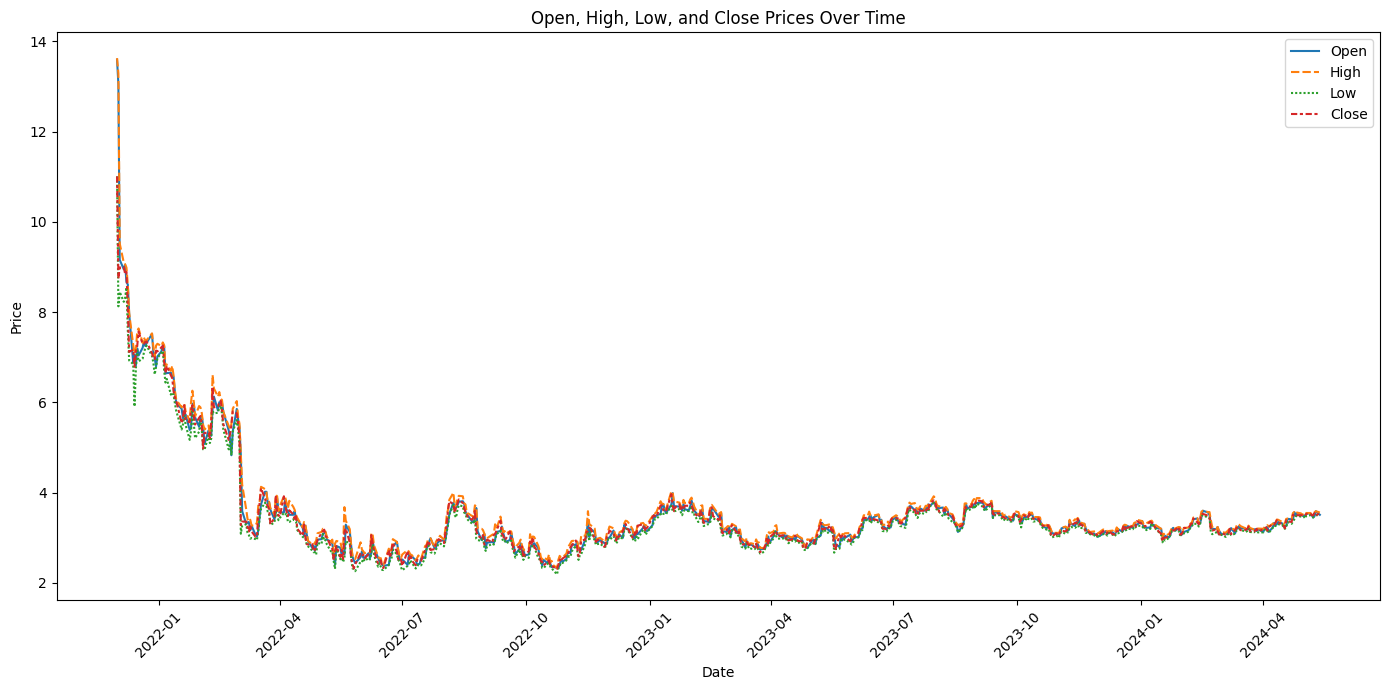

In [174]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the Open, High, Low, and Close prices
plt.figure(figsize=(14, 7))
sns.lineplot(data=df[['Open', 'High', 'Low', 'Close']])
plt.title('Open, High, Low, and Close Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

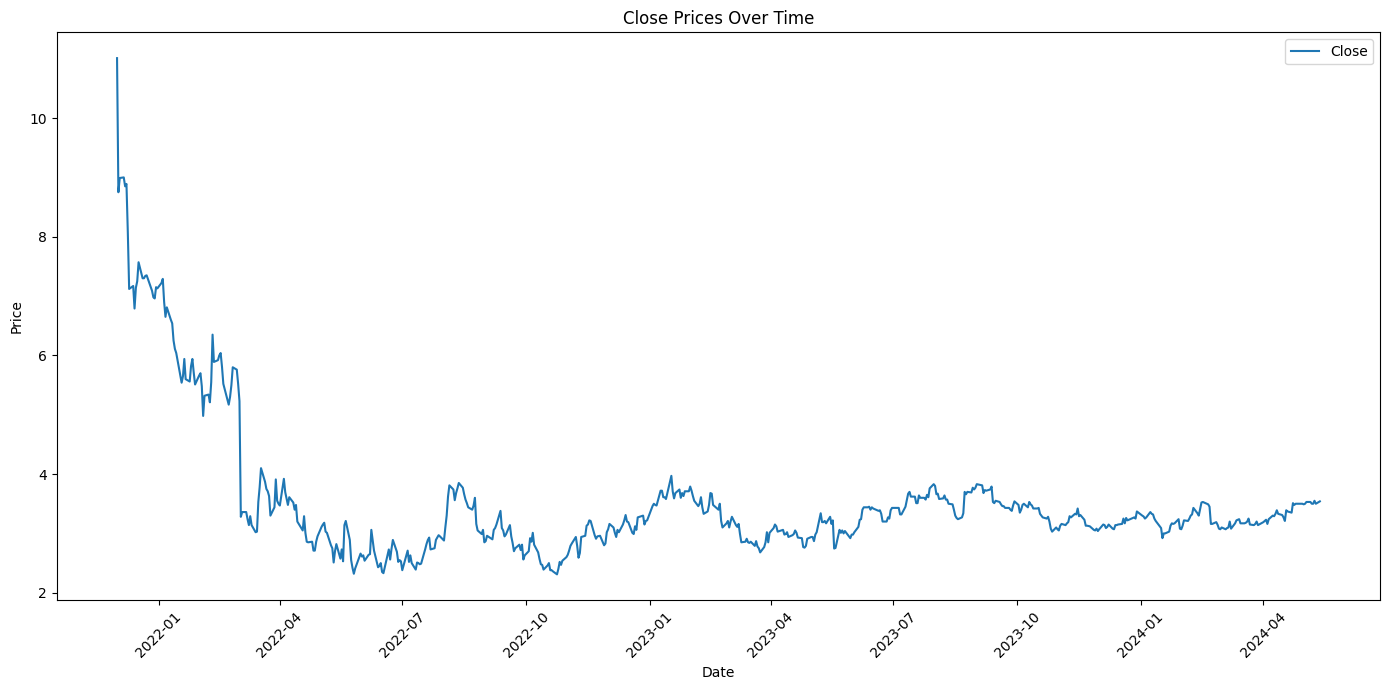

In [175]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the Open, High, Low, and Close prices
plt.figure(figsize=(14, 7))
sns.lineplot(data=df[['Close']])
plt.title('Close Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Linear Interpolation (Rejected)

In [176]:
# import pandas as pd

# full_index = pd.date_range(start=df.index.min(), end=df.index.max(), freq='B')

# df = df.reindex(full_index)

# df_interpolated = df.interpolate(method='linear')

# df_interpolated.reset_index(inplace=True)
# df_interpolated.rename(columns={'index': 'Date'}, inplace=True)

# # แสดงตัวอย่าง
# print(df_interpolated.head(10))


# Adfuller

In [177]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df['Close'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')


ADF Statistic: -4.885534
p-value: 0.000037
Critical Values:


# Train-Test Split (Change Train/Test ratio here)

In [178]:
test_ratio = 0.2

train_size = int(len(df) * (1 - test_ratio))

train_data = df.iloc[:train_size]
test_data = df.iloc[train_size:]

print("Training data size:", len(train_data))
print("Test data size:", len(test_data))

Training data size: 492
Test data size: 123


In [179]:
test_data.index[0]

Timestamp('2023-11-15 00:00:00')

# Simple Exponential Smoothing

In [180]:
# Fit the SimpleExpSmoothing model on the training data
model_ses = SimpleExpSmoothing(train_data['Close'])
fit_model_ses = model_ses.fit()

predictions_ses = fit_model_ses.forecast(len(test_data))

/Users/my-spaces/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/my-spaces/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/my-spaces/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [181]:
ses_model = SimpleExpSmoothing(train_data['Close']).fit()

# แสดงค่าที่ได้จากการสร้างตัวแบบ
print(ses_model.summary())

                       SimpleExpSmoothing Model Results                       
Dep. Variable:                  Close   No. Observations:                  492
Model:             SimpleExpSmoothing   SSE                             21.886
Optimized:                       True   AIC                          -1527.425
Trend:                           None   BIC                          -1519.028
Seasonal:                        None   AICC                         -1527.343
Seasonal Periods:                None   Date:                 Fri, 01 Aug 2025
Box-Cox:                        False   Time:                         23:25:06
Box-Cox Coeff.:                  None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            1.0000000                alpha                 True
initial_level              11.010000                

/Users/my-spaces/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [182]:
rmse_ses = np.sqrt(mean_squared_error(test_data["Close"], predictions_ses))
print(f"\nRMSE of ses: {rmse_ses}")

mae_ses = mean_absolute_error(test_data["Close"], predictions_ses)
print(f"MAE of ses: {mae_ses}")

mape_ses = mean_absolute_percentage_error(test_data["Close"], predictions_ses)*100
print(f"MAPE of ses: {mape_ses}%")


RMSE of ses: 0.16463682630303803
MAE of ses: 0.14308943096578614
MAPE of ses: 4.466947260811222%


In [183]:
ses_pred = fit_model_ses.forecast(len(test_data))
print('Simple Exponential Smoothing Predictions:')
ses_pred

Simple Exponential Smoothing Predictions:


/Users/my-spaces/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/my-spaces/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


492    3.32
493    3.32
494    3.32
495    3.32
496    3.32
       ... 
610    3.32
611    3.32
612    3.32
613    3.32
614    3.32
Length: 123, dtype: float64

## RMSE, MAE และ MAPE of test data

In [184]:
# Calculate RMSE for the test set
rmse_ses = np.sqrt(mean_squared_error(test_data['Close'], ses_pred))
print("RMSE of SES:", rmse_ses)

RMSE of SES: 0.16463682630303803


In [185]:
# Calculate MAE for the test set
mae_ses = mean_absolute_error(test_data['Close'], ses_pred)
print("MAE of SES:", mae_ses)

MAE of SES: 0.14308943096578614


In [186]:
# Calculate MAPE for the test set
mape_ses = mean_absolute_percentage_error(test_data['Close'], ses_pred)
print("MAPE of SES:", mape_ses)
print(", " + str(mape_ses*100) + "%")

MAPE of SES: 0.044669472608112215
, 4.466947260811222%


In [187]:
test_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-11-15,3.330,3.440,3.33,3.42,3.42,19083800
2023-11-16,3.388,3.388,3.22,3.29,3.29,28915500
2023-11-17,3.280,3.340,3.22,3.31,3.31,19511100
2023-11-20,3.310,3.310,3.21,3.23,3.23,24865500
2023-11-21,3.200,3.210,3.11,3.13,3.13,22846200


### Predict and Actual Comparison Graph Display

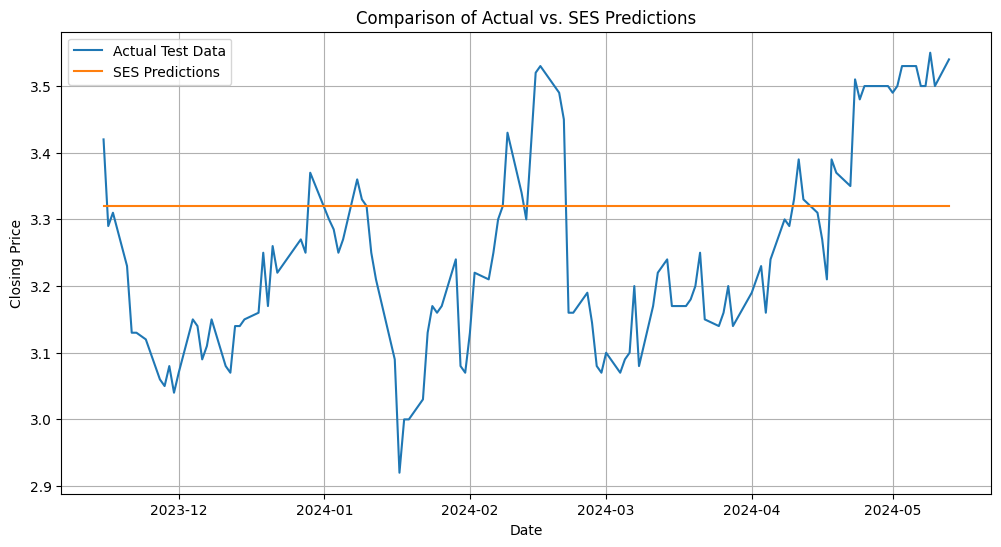

In [188]:
# สร้างกราฟเปรียบเทียบ
plt.figure(figsize=(12, 6))
plt.plot(test_data.index, test_data['Close'], label='Actual Test Data')
plt.plot(test_data.index, ses_pred, label='SES Predictions')
plt.title('Comparison of Actual vs. SES Predictions')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.grid(True)
plt.show()

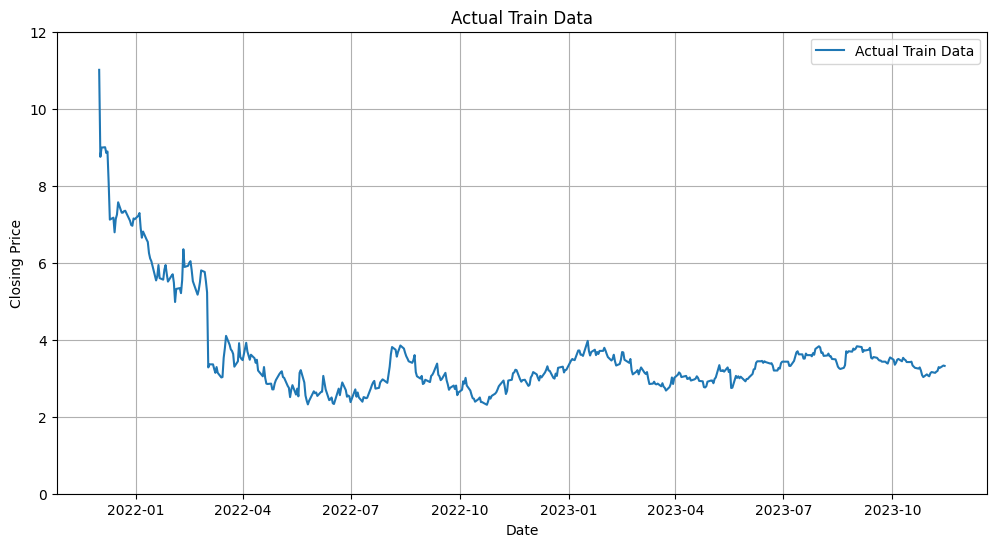

In [189]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data['Close'], label='Actual Train Data')
plt.title('Actual Train Data')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.ylim(0, 12)
plt.legend()
plt.grid(True)
plt.show()

# Double exponential smoothing

## Add

In [190]:
# prompt: ใช้ Double exponential smoothing กับ train_df['Close']

from statsmodels.tsa.holtwinters import ExponentialSmoothing

des_model = ExponentialSmoothing(train_data['Close'], trend='add').fit()

# แสดงค่าที่ได้จากการสร้างตัวแบบ
print(des_model.summary())


                       ExponentialSmoothing Model Results                       
Dep. Variable:                    Close   No. Observations:                  492
Model:             ExponentialSmoothing   SSE                             21.621
Optimized:                         True   AIC                          -1529.405
Trend:                         Additive   BIC                          -1512.611
Seasonal:                          None   AICC                         -1529.232
Seasonal Periods:                  None   Date:                 Fri, 01 Aug 2025
Box-Cox:                          False   Time:                         23:25:07
Box-Cox Coeff.:                    None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.9831625                alpha                 True
smoothing_trend            0.01730

/Users/my-spaces/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [191]:
# ใช้ตัวแบบทำนายข้อมูลชุด test

start = len(train_data)
end = len(train_data) + len(test_data) - 1

des_pred_add = des_model.forecast(len(test_data))
print('Double Exponential Smoothing Predictions:')
des_pred_add

Double Exponential Smoothing Predictions:


/Users/my-spaces/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/my-spaces/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


492    3.319327
493    3.318515
494    3.317703
495    3.316891
496    3.316078
         ...   
610    3.223481
611    3.222668
612    3.221856
613    3.221044
614    3.220232
Length: 123, dtype: float64

### RMSE, MAE และ MAPE of test data

In [192]:
# Calculate RMSE for the test set
rmse_des = np.sqrt(mean_squared_error(test_data['Close'], ses_pred))
print("RMSE of DES:", rmse_des)

RMSE of DES: 0.16463682630303803


In [193]:
# Calculate MAE for the test set
mae_des = mean_absolute_error(test_data['Close'], des_pred_add)
print("MAE of DES:", mae_des)

MAE of DES: 0.13701241639124742


In [194]:
# Calculate MAPE for the test set
mape_des = mean_absolute_percentage_error(test_data['Close'], ses_pred)
print("MAPE of DES:", mape_des)
print(", " + str(mape_des*100) + "%")

MAPE of DES: 0.044669472608112215
, 4.466947260811222%


### Predict and Actual Comparison Graph Display

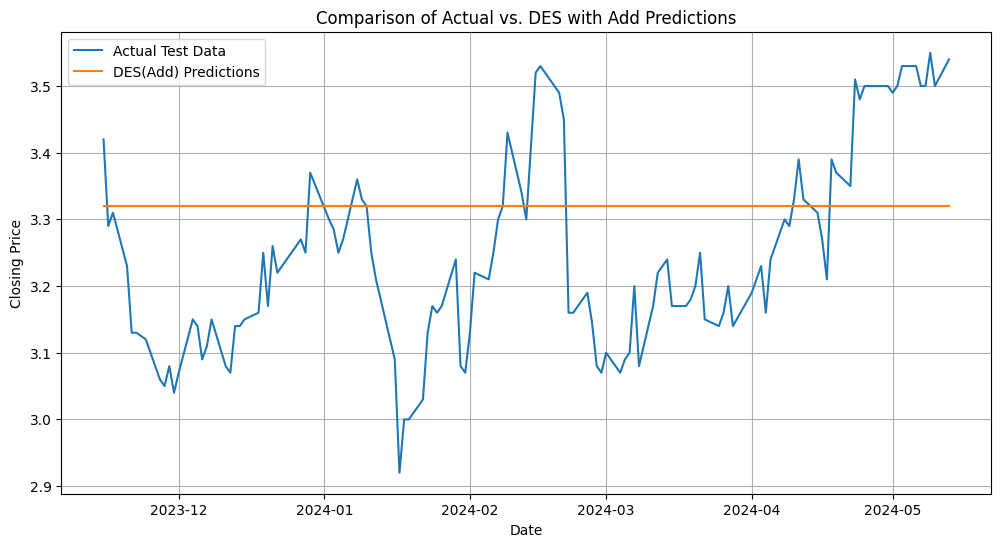

In [195]:
# สร้างกราฟเปรียบเทียบ
plt.figure(figsize=(12, 6))
plt.plot(test_data.index, test_data['Close'], label='Actual Test Data')
plt.plot(test_data.index, ses_pred, label='DES(Add) Predictions')
plt.title('Comparison of Actual vs. DES with Add Predictions')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.grid(True)
plt.show()

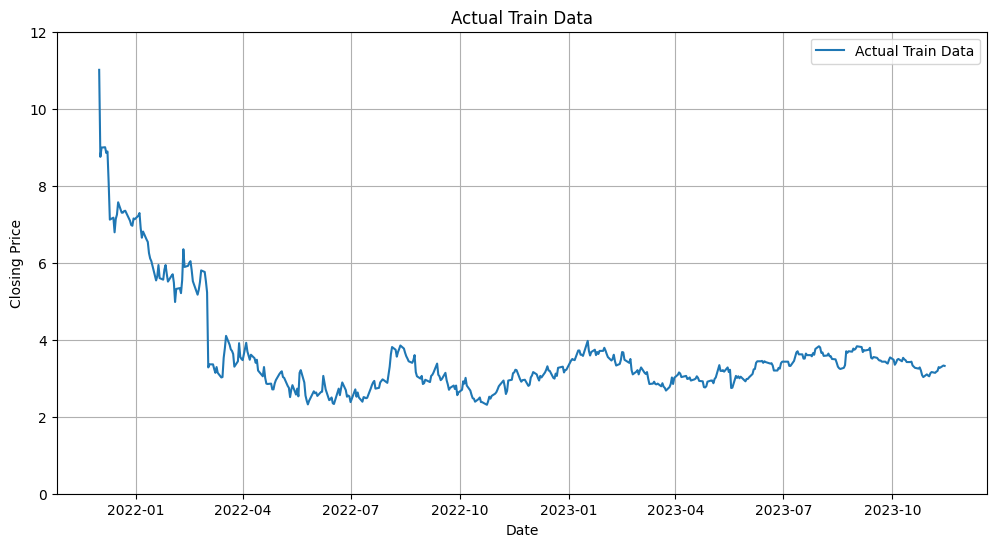

In [196]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data['Close'], label='Actual Train Data')
plt.title('Actual Train Data')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.ylim(0, 12)
plt.legend()
plt.grid(True)
plt.show()

## Mul

In [197]:
# prompt: ใช้ Double exponential smoothing กับ train_df['Close']

from statsmodels.tsa.holtwinters import ExponentialSmoothing

des_model = ExponentialSmoothing(train_data['Close'], trend='mul').fit()

# แสดงค่าที่ได้จากการสร้างตัวแบบ
print(des_model.summary())


                       ExponentialSmoothing Model Results                       
Dep. Variable:                    Close   No. Observations:                  492
Model:             ExponentialSmoothing   SSE                             20.713
Optimized:                         True   AIC                          -1550.516
Trend:                   Multiplicative   BIC                          -1533.723
Seasonal:                          None   AICC                         -1550.343
Seasonal Periods:                  None   Date:                 Fri, 01 Aug 2025
Box-Cox:                          False   Time:                         23:25:07
Box-Cox Coeff.:                    None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.9825637                alpha                 True
smoothing_trend            0.01102

/Users/my-spaces/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [198]:
# Fit Double Exponential Smoothing model with multiplicative trend
from statsmodels.tsa.holtwinters import ExponentialSmoothing

des_model_mul = ExponentialSmoothing(train_data['Close'], trend='mul').fit()

# ใช้ตัวแบบทำนายข้อมูลชุด test
start = len(train_data)
end = len(train_data) + len(test_data) - 1

des_pred_mul = des_model_mul.forecast(len(test_data))
print('Double Exponential Smoothing Predictions:')
des_pred_mul

Double Exponential Smoothing Predictions:


/Users/my-spaces/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/my-spaces/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/my-spaces/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


492    3.320886
493    3.321602
494    3.322317
495    3.323033
496    3.323750
         ...   
610    3.406403
611    3.407137
612    3.407871
613    3.408606
614    3.409340
Length: 123, dtype: float64

### RMSE, MAE และ MAPE of test data

In [199]:
# Calculate RMSE for the test set
rmse_des = np.sqrt(mean_squared_error(test_data['Close'], ses_pred))
print("RMSE of DES:", rmse_des)

RMSE of DES: 0.16463682630303803


In [200]:
# Calculate MAE for the test set
mae_des = mean_absolute_error(test_data['Close'], ses_pred)
print("MAE of DES:", mae_des)

MAE of DES: 0.14308943096578614


In [201]:
# Calculate MAPE for the test set
mape_des = mean_absolute_percentage_error(test_data['Close'], ses_pred)
print("MAPE of DES:", mape_des)
print(", " + str(mape_des*100) + "%")

MAPE of DES: 0.044669472608112215
, 4.466947260811222%


### Predict and Actual Comparison Graph Display

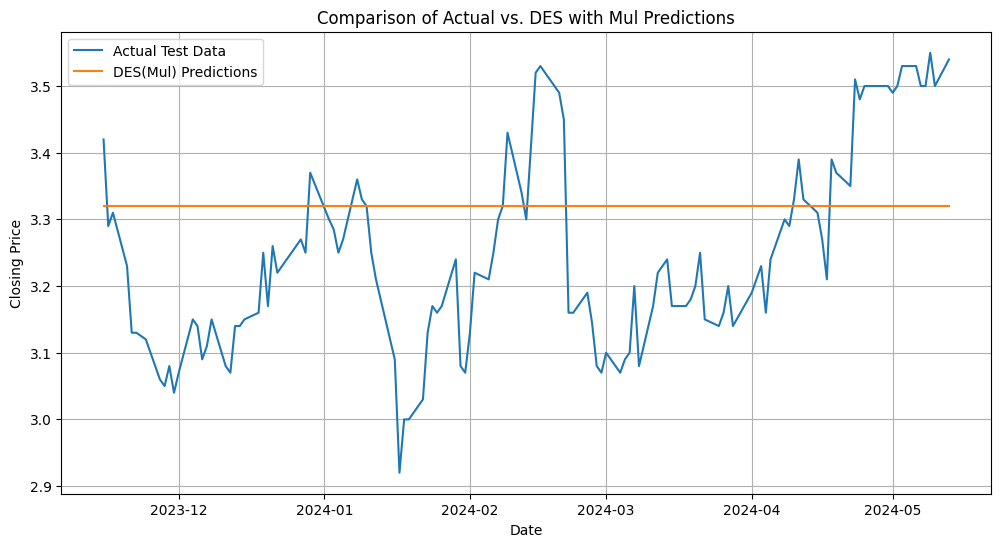

In [202]:
# สร้างกราฟเปรียบเทียบ
plt.figure(figsize=(12, 6))
plt.plot(test_data.index, test_data['Close'], label='Actual Test Data')
plt.plot(test_data.index, ses_pred, label='DES(Mul) Predictions')
plt.title('Comparison of Actual vs. DES with Mul Predictions')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.grid(True)
plt.show()

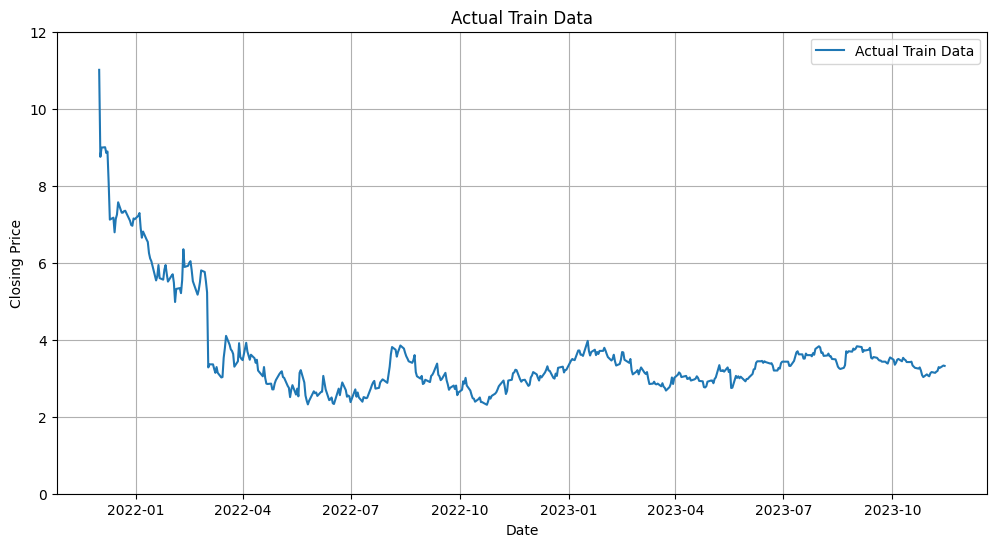

In [203]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data['Close'], label='Actual Train Data')
plt.title('Actual Train Data')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.ylim(0, 12)
plt.legend()
plt.grid(True)
plt.show()

# Holt Winter

## trend ="add", seasonal = "add"

In [204]:
model_hw_add_add = ExponentialSmoothing(train_data['Close'],
                                    trend ="add",
                                    seasonal = "add",
                                    seasonal_periods=12)

fit_model_hw_add_add = model_hw_add_add.fit()

predictions_hw_add_add = fit_model_hw_add_add.forecast(len(test_data))

/Users/my-spaces/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/my-spaces/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/my-spaces/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [205]:
print(fit_model_hw_add_add.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:                    Close   No. Observations:                  492
Model:             ExponentialSmoothing   SSE                             21.461
Optimized:                         True   AIC                          -1509.058
Trend:                         Additive   BIC                          -1441.882
Seasonal:                      Additive   AICC                         -1507.612
Seasonal Periods:                    12   Date:                 Fri, 01 Aug 2025
Box-Cox:                          False   Time:                         23:25:08
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               1.0000000                alpha                 True
smoothing_trend          

### RMSE, MAE และ MAPE of test data

In [206]:
rmse_hw_add_add = np.sqrt(mean_squared_error(test_data["Close"], predictions_hw_add_add))
print(f"\nRMSE of hw_add_add: {rmse_hw_add_add}")


RMSE of hw_add_add: 1.1215511894980879


In [207]:
mae_hw_add_add = mean_absolute_error(test_data["Close"], predictions_hw_add_add)
print(f"MAE of hw_add_add: {mae_hw_add_add}")

MAE of hw_add_add: 0.9268512184756669


In [208]:
mape_hw_add_add = mean_absolute_percentage_error(test_data["Close"], predictions_hw_add_add)*100
print(f"MAPE of hw_add_add: {mape_hw_add_add}%")

MAPE of hw_add_add: 28.041882465930602%


In [209]:
hw_add_add_pred = fit_model_hw_add_add.forecast(len(test_data))
print('Holt Winter with add trend and add seasonal Predictions:')
hw_add_add_pred

Holt Winter with add trend and add seasonal Predictions:


/Users/my-spaces/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/my-spaces/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


492    3.316754
493    3.298960
494    3.302746
495    3.242630
496    3.199453
         ...   
610    1.445350
611    1.443645
612    1.440399
613    1.422605
614    1.426391
Length: 123, dtype: float64

### Predict and Actual Comparison Graph Display

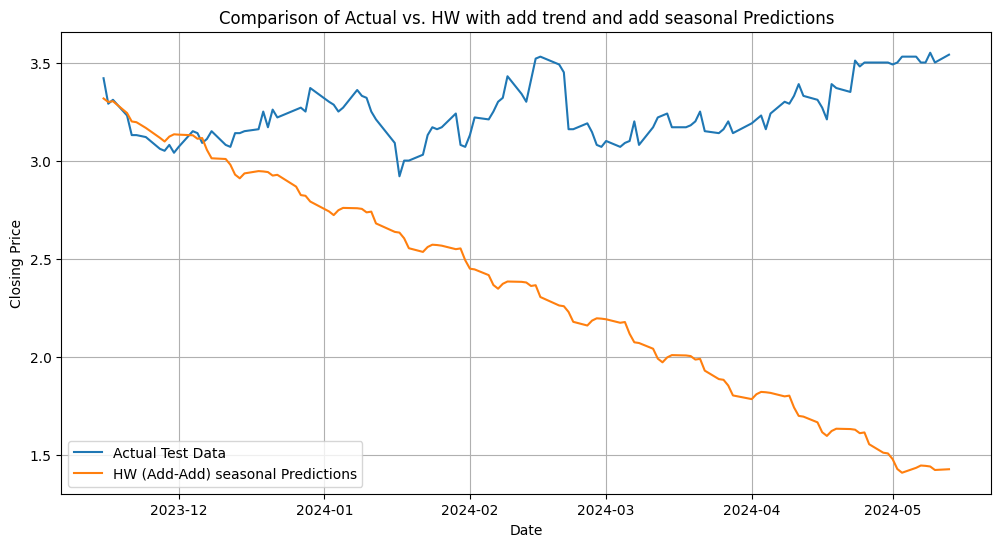

In [210]:
plt.figure(figsize=(12, 6))
plt.plot(test_data.index, test_data['Close'], label='Actual Test Data')
plt.plot(test_data.index, hw_add_add_pred, label='HW (Add-Add) seasonal Predictions')
plt.title('Comparison of Actual vs. HW with add trend and add seasonal Predictions')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.grid(True)
plt.show()

## trend ="add", seasonal = "mul"

In [211]:
model_hw_add_mul = ExponentialSmoothing(train_data['Close'],
                                    trend ="add",
                                    seasonal = "mul",
                                    seasonal_periods=12)

fit_model_hw_add_mul = model_hw_add_mul.fit()

predictions_hw_add_mul = fit_model_hw_add_mul.forecast(len(test_data))

/Users/my-spaces/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/my-spaces/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/my-spaces/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [212]:
print(fit_model_hw_add_mul.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:                    Close   No. Observations:                  492
Model:             ExponentialSmoothing   SSE                             20.344
Optimized:                         True   AIC                          -1535.363
Trend:                         Additive   BIC                          -1468.187
Seasonal:                Multiplicative   AICC                         -1533.917
Seasonal Periods:                    12   Date:                 Fri, 01 Aug 2025
Box-Cox:                          False   Time:                         23:25:09
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.9200629                alpha                 True
smoothing_trend          

### RMSE, MAE และ MAPE of test data

In [213]:
rmse_hw_add_mul = np.sqrt(mean_squared_error(test_data["Close"], predictions_hw_add_mul))
print(f"\nRMSE of hw_add_mul: {rmse_hw_add_mul}")


RMSE of hw_add_mul: 0.1688238511559005


In [214]:
mae_hw_add_mul = mean_absolute_error(test_data["Close"], predictions_hw_add_mul)
print(f"MAE of hw_add_mul: {mae_hw_add_mul}")

MAE of hw_add_mul: 0.14454249869244348


In [215]:
mape_hw_add_mul = mean_absolute_percentage_error(test_data["Close"], predictions_hw_add_mul)*100
print(f"MAPE of hw_add_mul: {mape_hw_add_mul}%")

MAPE of hw_add_mul: 4.493230349956607%


In [216]:
hw_add_mul_pred = fit_model_hw_add_mul.forecast(len(test_data))
print('Holt Winter with add trend and mul seasonal Predictions Predictions:')
hw_add_mul_pred

Holt Winter with add trend and mul seasonal Predictions Predictions:


/Users/my-spaces/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/my-spaces/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


492    3.345415
493    3.398642
494    3.408860
495    3.379145
496    3.332434
         ...   
610    3.230856
611    3.263337
612    3.284929
613    3.337185
614    3.347208
Length: 123, dtype: float64

### Predict and Actual Comparison Graph Display

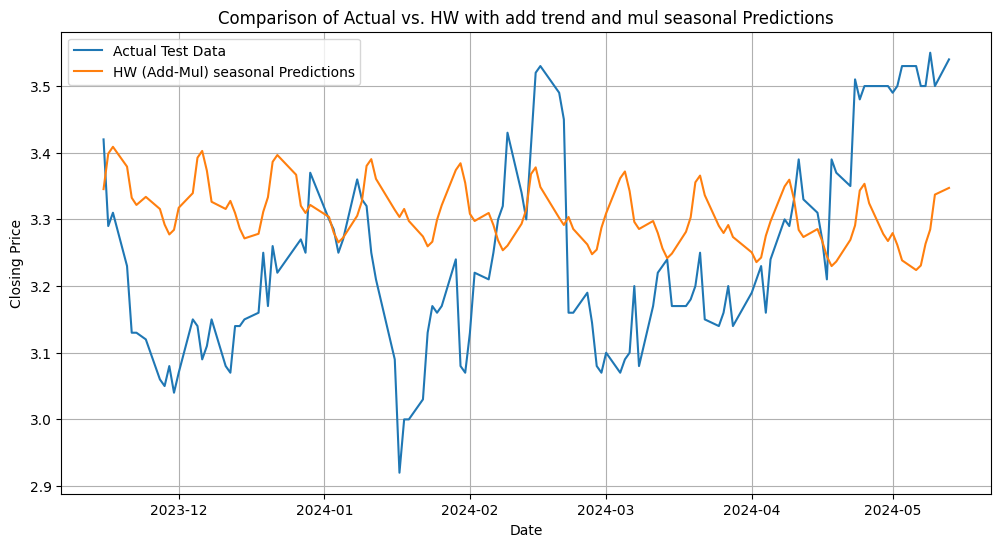

In [217]:
plt.figure(figsize=(12, 6))
plt.plot(test_data.index, test_data['Close'], label='Actual Test Data')
plt.plot(test_data.index, hw_add_mul_pred, label='HW (Add-Mul) seasonal Predictions')
plt.title('Comparison of Actual vs. HW with add trend and mul seasonal Predictions')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.grid(True)
plt.show()

## trend ="mul", seasonal = "add"

In [218]:
model_hw_mul_add = ExponentialSmoothing(train_data['Close'],
                                    trend ="mul",
                                    seasonal = "add",
                                    seasonal_periods=12)

fit_model_hw_mul_add = model_hw_mul_add.fit()

predictions_hw_mul_add = fit_model_hw_mul_add.forecast(len(test_data))

/Users/my-spaces/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/my-spaces/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/my-spaces/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [219]:
print(fit_model_hw_mul_add.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:                    Close   No. Observations:                  492
Model:             ExponentialSmoothing   SSE                             19.928
Optimized:                         True   AIC                          -1545.524
Trend:                   Multiplicative   BIC                          -1478.348
Seasonal:                      Additive   AICC                         -1544.078
Seasonal Periods:                    12   Date:                 Fri, 01 Aug 2025
Box-Cox:                          False   Time:                         23:25:10
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               1.0000000                alpha                 True
smoothing_trend          

### RMSE, MAE และ MAPE of test data

In [220]:
rmse_hw_mul_add = np.sqrt(mean_squared_error(test_data["Close"], predictions_hw_mul_add))
print(f"\nRMSE of hw_mul_add: {rmse_hw_mul_add}")


RMSE of hw_mul_add: 0.3604830575110804


In [221]:
mae_hw_mul_add = mean_absolute_error(test_data["Close"], predictions_hw_mul_add)
print(f"MAE of hw_mul_add: {mae_hw_mul_add}")

MAE of hw_mul_add: 0.28690686600547927


In [222]:
mape_hw_mul_add = mean_absolute_percentage_error(test_data["Close"], predictions_hw_mul_add)*100
print(f"MAPE of hw_mul_add: {mape_hw_mul_add}%")

MAPE of hw_mul_add: 8.61780542556955%


In [223]:
hw_mul_add_pred = fit_model_hw_mul_add.forecast(len(test_data))
print('Holt Winter with mul trend and add seasonal Predictions Predictions:')
hw_mul_add_pred

Holt Winter with mul trend and add seasonal Predictions Predictions:


/Users/my-spaces/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/my-spaces/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


492    3.324647
493    3.318993
494    3.332057
495    3.284062
496    3.252870
         ...   
610    2.777416
611    2.789430
612    2.797264
613    2.794778
614    2.810992
Length: 123, dtype: float64

### Predict and Actual Comparison Graph Display

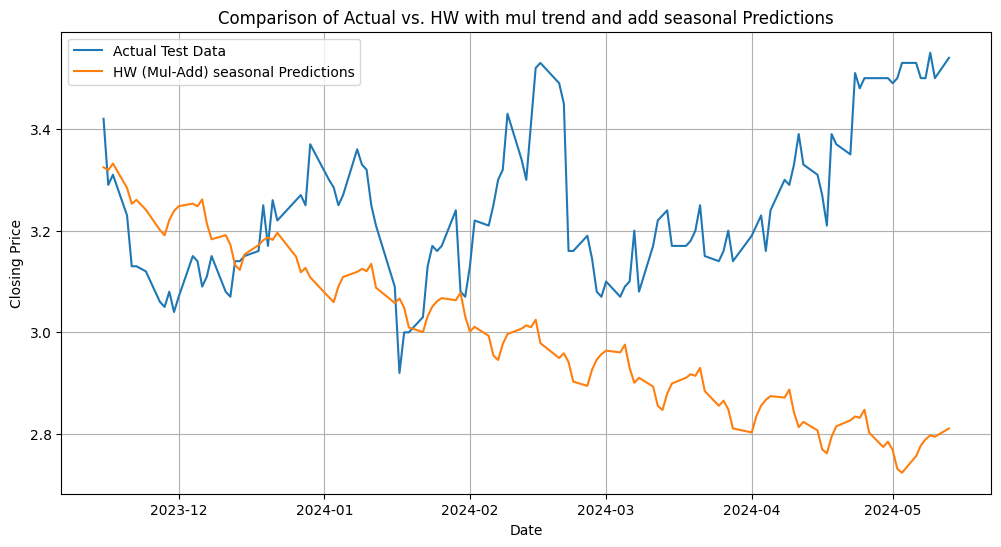

In [224]:
plt.figure(figsize=(12, 6))
plt.plot(test_data.index, test_data['Close'], label='Actual Test Data')
plt.plot(test_data.index, hw_mul_add_pred, label='HW (Mul-Add) seasonal Predictions')
plt.title('Comparison of Actual vs. HW with mul trend and add seasonal Predictions')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.grid(True)
plt.show()

## trend ="mul", seasonal = "mul"

In [225]:
model_hw_mul_mul = ExponentialSmoothing(train_data['Close'],
                                    trend ="mul",
                                    seasonal = "mul",
                                    seasonal_periods=12)

fit_model_hw_mul_mul = model_hw_mul_mul.fit()

predictions_hw_mul_mul = fit_model_hw_mul_mul.forecast(len(test_data))

/Users/my-spaces/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/my-spaces/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/my-spaces/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [226]:
print(fit_model_hw_mul_mul.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:                    Close   No. Observations:                  492
Model:             ExponentialSmoothing   SSE                             19.611
Optimized:                         True   AIC                          -1553.423
Trend:                   Multiplicative   BIC                          -1486.248
Seasonal:                Multiplicative   AICC                         -1551.977
Seasonal Periods:                    12   Date:                 Fri, 01 Aug 2025
Box-Cox:                          False   Time:                         23:25:11
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.9202790                alpha                 True
smoothing_trend          

### RMSE, MAE และ MAPE of test data

In [227]:
rmse_hw_mul_mul = np.sqrt(mean_squared_error(test_data["Close"], predictions_hw_mul_mul))
print(f"\nRMSE of hw_mul_mul: {rmse_hw_mul_mul}")


RMSE of hw_mul_mul: 0.17797733920759687


In [228]:
mae_hw_mul_mul = mean_absolute_error(test_data["Close"], predictions_hw_mul_mul)
print(f"MAE of hw_mul_mul: {mae_hw_mul_mul}")

MAE of hw_mul_mul: 0.15514459059537936


In [229]:
mape_hw_mul_mul = mean_absolute_percentage_error(test_data["Close"], predictions_hw_mul_mul)*100
print(f"MAPE of hw_mul_mul: {mape_hw_mul_mul}%")

MAPE of hw_mul_mul: 4.872485152926386%


In [230]:
hw_mul_mul_pred = fit_model_hw_mul_mul.forecast(len(test_data))
print('Holt Winter with mul trend and mul seasonal Predictions Predictions:')
hw_mul_mul_pred

Holt Winter with mul trend and mul seasonal Predictions Predictions:


/Users/my-spaces/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/my-spaces/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


492    3.345308
493    3.395012
494    3.401438
495    3.371495
496    3.327841
         ...   
610    3.328020
611    3.362294
612    3.384416
613    3.434702
614    3.441203
Length: 123, dtype: float64

### Predict and Actual Comparison Graph Display

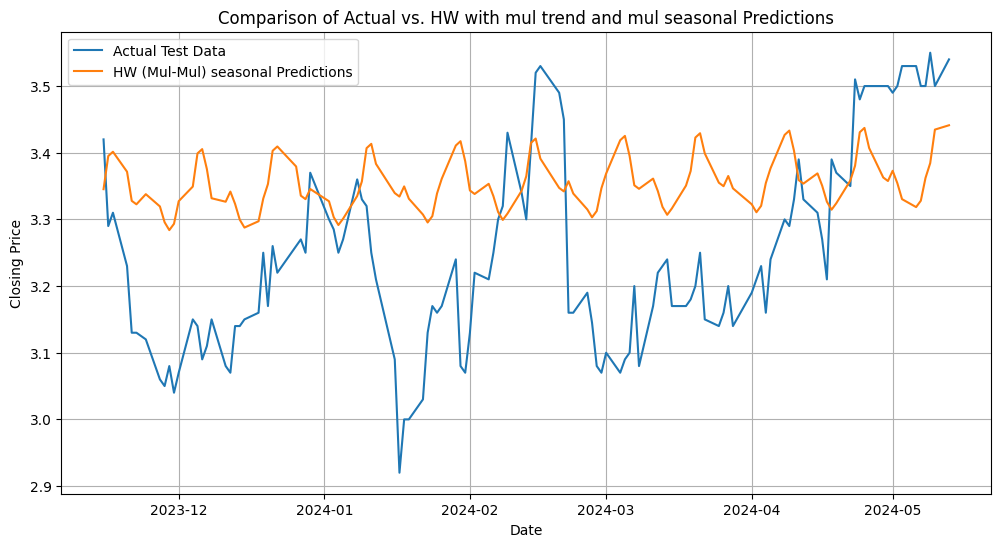

In [231]:
plt.figure(figsize=(12, 6))
plt.plot(test_data.index, test_data['Close'], label='Actual Test Data')
plt.plot(test_data.index, hw_mul_mul_pred, label='HW (Mul-Mul) seasonal Predictions')
plt.title('Comparison of Actual vs. HW with mul trend and mul seasonal Predictions')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.grid(True)
plt.show()

In [232]:
# Calculate all metrics in one cell
rmse_ses = np.sqrt(mean_squared_error(test_data["Close"], predictions_ses))
mae_ses = mean_absolute_error(test_data["Close"], predictions_ses)
mape_ses = mean_absolute_percentage_error(test_data["Close"], predictions_ses) * 100

rmse_des_add = np.sqrt(mean_squared_error(test_data['Close'], des_pred_add))
mae_des_add = mean_absolute_error(test_data['Close'], des_pred_add)
mape_des_add = mean_absolute_percentage_error(test_data['Close'], des_pred_add) * 100

rmse_des_mul = np.sqrt(mean_squared_error(test_data['Close'], des_pred_mul))
mae_des_mul = mean_absolute_error(test_data['Close'], des_pred_mul)
mape_des_mul = mean_absolute_percentage_error(test_data['Close'], des_pred_mul) * 100

rmse_hw_add_add = np.sqrt(mean_squared_error(test_data["Close"], predictions_hw_add_add))
mae_hw_add_add = mean_absolute_error(test_data["Close"], predictions_hw_add_add)
mape_hw_add_add = mean_absolute_percentage_error(test_data["Close"], predictions_hw_add_add) * 100

rmse_hw_add_mul = np.sqrt(mean_squared_error(test_data["Close"], predictions_hw_add_mul))
mae_hw_add_mul = mean_absolute_error(test_data["Close"], predictions_hw_add_mul)
mape_hw_add_mul = mean_absolute_percentage_error(test_data["Close"], predictions_hw_add_mul) * 100

rmse_hw_mul_add = np.sqrt(mean_squared_error(test_data["Close"], predictions_hw_mul_add))
mae_hw_mul_add = mean_absolute_error(test_data["Close"], predictions_hw_mul_add)
mape_hw_mul_add = mean_absolute_percentage_error(test_data["Close"], predictions_hw_mul_add) * 100

rmse_hw_mul_mul = np.sqrt(mean_squared_error(test_data["Close"], predictions_hw_mul_mul))
mae_hw_mul_mul = mean_absolute_error(test_data["Close"], predictions_hw_mul_mul)
mape_hw_mul_mul = mean_absolute_percentage_error(test_data["Close"], predictions_hw_mul_mul) * 100

# Create a dictionary to store the results
results = {
    'Model': ['Simple Exponential Smoothing',
              'Double Exponential Smoothing (Add)',
              'Double Exponential Smoothing (Mul)',
              'Holt-Winters (Add-Add)',
              'Holt-Winters (Add-Mul)',
              'Holt-Winters (Mul-Add)',
              'Holt-Winters (Mul-Mul)'],
    'RMSE': [rmse_ses,
             rmse_des_add,
             rmse_des_mul,
             rmse_hw_add_add,
             rmse_hw_add_mul,
             rmse_hw_mul_add,
             rmse_hw_mul_mul],
    'MAE': [mae_ses,
            mae_des_add,
            mae_des_mul,
            mae_hw_add_add,
            mae_hw_add_mul,
            mae_hw_mul_add,
            mae_hw_mul_mul],
    'MAPE (%)': [mape_ses,
                 mape_des_add,
                 mape_des_mul,
                 mape_hw_add_add,
                 mape_hw_add_mul,
                 mape_hw_mul_add,
                 mape_hw_mul_mul]
}

# Create a DataFrame from the dictionary
results_df = pd.DataFrame(results)

# Display the results table
results_df


,Model,RMSE,MAE,MAPE (%)
0,Simple Exponential Smoothing,0.164637,0.143089,4.466947
1,Double Exponential Smoothing (Add),0.165545,0.137012,4.220174
2,Double Exponential Smoothing (Mul),0.180325,0.157825,4.967869
3,Holt-Winters (Add-Add),1.121551,0.926851,28.041882
4,Holt-Winters (Add-Mul),0.168824,0.144542,4.493230
5,Holt-Winters (Mul-Add),0.360483,0.286907,8.617805
6,Holt-Winters (Mul-Mul),0.177977,0.155145,4.872485


/var/folders/l3/5t98q28518n1zm69xnmf5nth0000gn/T/ipykernel_17212/151156369.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='RMSE', data=results_df, palette='viridis')


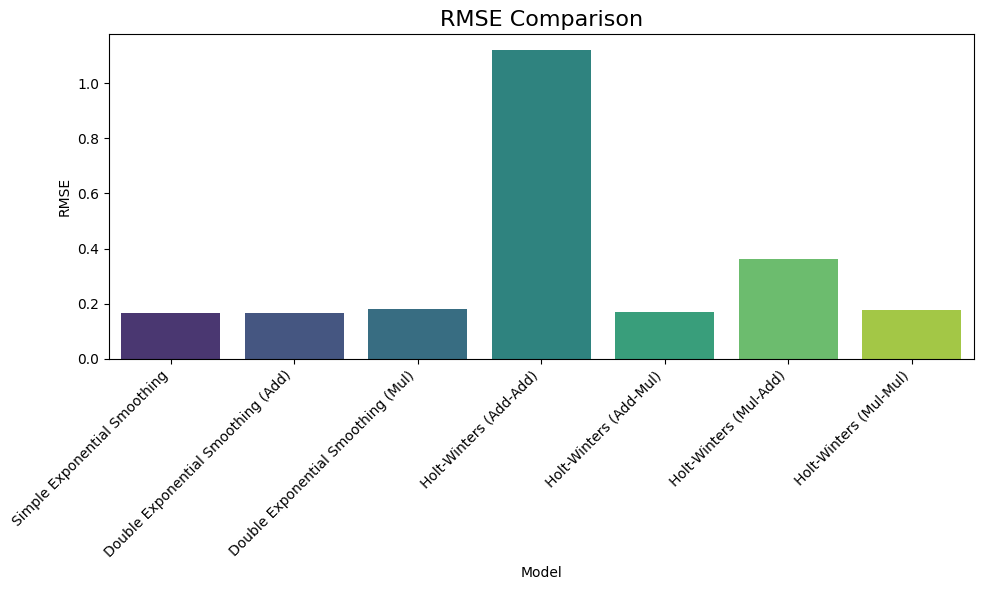

/var/folders/l3/5t98q28518n1zm69xnmf5nth0000gn/T/ipykernel_17212/151156369.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='MAE', data=results_df, palette='plasma')


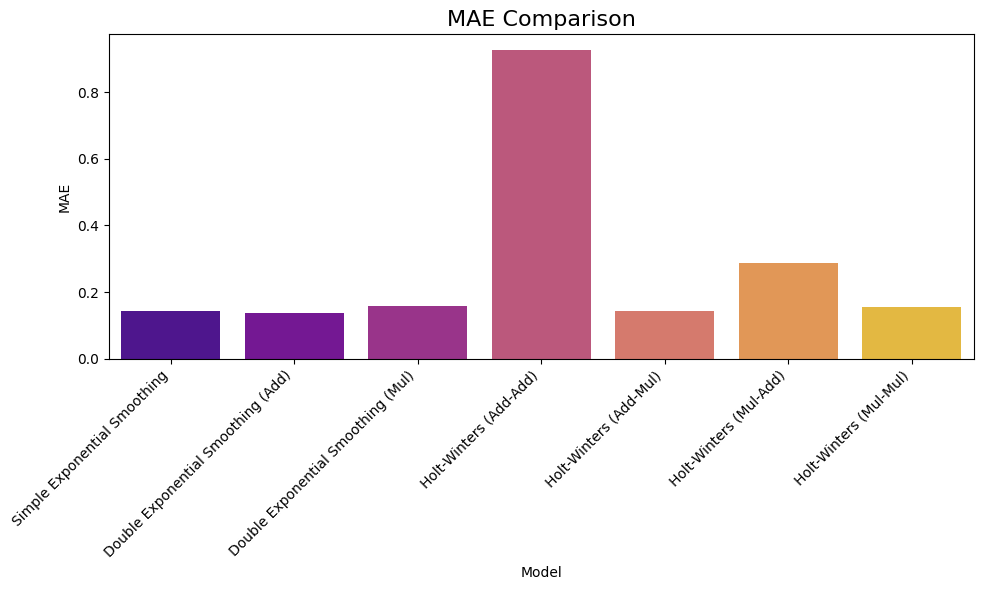

/var/folders/l3/5t98q28518n1zm69xnmf5nth0000gn/T/ipykernel_17212/151156369.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='MAPE (%)', data=results_df, palette='coolwarm')


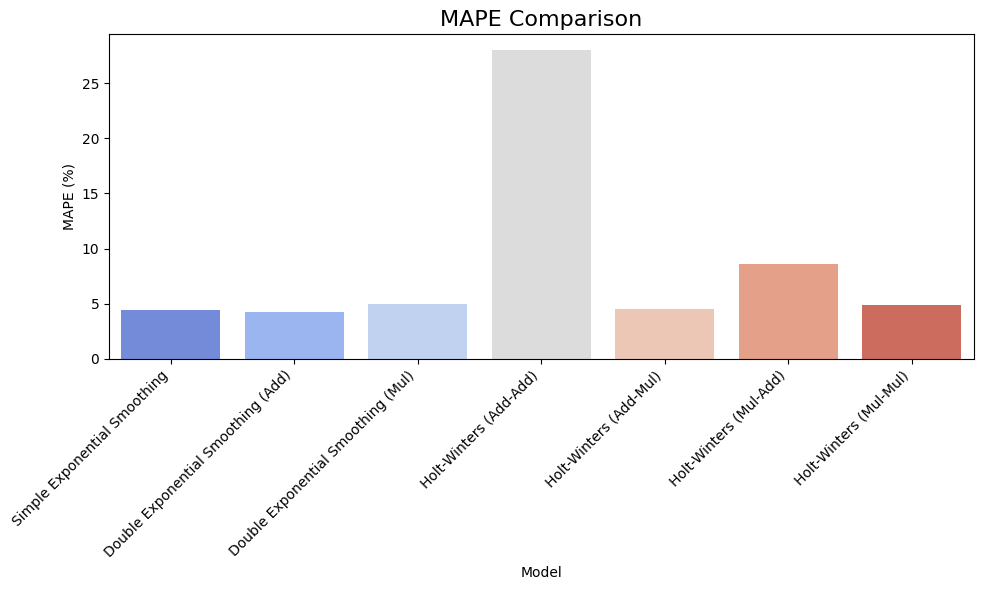

In [233]:
# --- กราฟที่ 1: RMSE ---
plt.figure(figsize=(10, 6)) # สร้างหน้าต่างใหม่สำหรับ plot นี้
sns.barplot(x='Model', y='RMSE', data=results_df, palette='viridis')
plt.title('RMSE Comparison', fontsize=16)
plt.ylabel('RMSE')
plt.xlabel('Model')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# --- กราฟที่ 2: MAE ---
plt.figure(figsize=(10, 6)) # สร้างหน้าต่างใหม่สำหรับ plot นี้
sns.barplot(x='Model', y='MAE', data=results_df, palette='plasma')
plt.title('MAE Comparison', fontsize=16)
plt.ylabel('MAE')
plt.xlabel('Model')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# --- กราฟที่ 3: MAPE ---
plt.figure(figsize=(10, 6)) # สร้างหน้าต่างใหม่สำหรับ plot นี้
sns.barplot(x='Model', y='MAPE (%)', data=results_df, palette='coolwarm')
plt.title('MAPE Comparison', fontsize=16)
plt.ylabel('MAPE (%)')
plt.xlabel('Model')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()